# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

In [1]:
# Your work here.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
import scipy.stats

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1) Is the distribution of body temperatures normal?

We'll first consider a probability plot, comparing the sample with a normal distribution. We then apply the D’Agostino $K^2$-test and the Shapiro-Wilk test, setting a significance level $\alpha=0.05$(should be above 0.05).


# Probability Plot

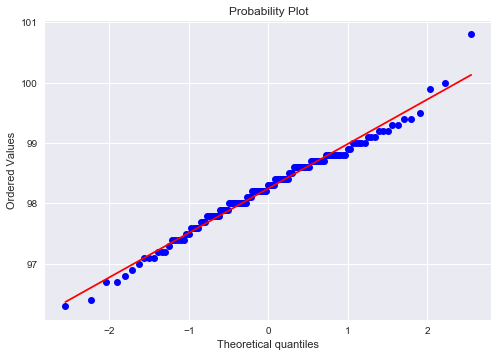

In [4]:
scipy.stats.probplot(df.temperature, dist="norm", plot=plt)
plt.show()


# D'Agostino $K^2$ Test

In [5]:
scipy.stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [6]:
scipy.stats.kurtosistest(df.temperature), scipy.stats.skewtest(df.temperature)

(KurtosistestResult(statistic=1.6441851280847679, pvalue=0.10013796794683075),
 SkewtestResult(statistic=-0.021370491432771001, pvalue=0.98295011261353815))

# Shapiro-Wilk Test

In [9]:
scipy.stats.shapiro(df.temperature)

(0.9865769743919373, 0.2331680953502655)

From above
* Probability plot - We see that the dots are along the line but it is skewed little bit.
* D'agostino test and Shapiro test - We see that the p values are large enough that we cann't reject the null hypothesis.

That indicates that the data is approximately normally distributed.


# 2) Is the sample size large? Are the observations independent? 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


There are 130 samples.The observations are assumed to be independent due the absence of anymore data.

# 3)  Is the true population mean really 98.6 degrees F? 

It's best to use a one-sample test, since we are interested in comparing the sample mean of a single population with a known value. Furthermore, since we don't know the population standard deviation, we should use the _t_-test, despite the fact that the sample size is greater then thirty.

We assume the null hypothesis that the population mean is 98.6$\mbox{}^\circ$ F, and set the significance level $\alpha = 0.05$.

In [15]:
temp_mean = df.temperature.mean()
temp_std = df.temperature.std()
print(temp_mean)
print(temp_std)

98.24923076923078
0.7331831580389454


In [16]:
# Use one-sample test with the null hypothesis that true population mean is 98.6
# Since we do not know the population standard deviation, we will use t-statistic. 

n = len(df.temperature)
se = temp_std/np.sqrt(n)

t_stat = (temp_mean - 98.6)/se
p_value = stats.t.sf(np.abs(t_stat), n-1)*2
print("The t-statistic is {:1.3f} and the p-value is {:1.7f}".format(t_stat, p_value))

The t-statistic is -5.455 and the p-value is 0.0000002


In [17]:
# Now if we use z-statistic, the result will be similar because the sample size is quite large.
# As sample size increases, t ditribution approaches the standard normal z distribution.

z_stat = (temp_mean - 98.6)/se
p_val = stats.norm.sf(np.abs(z_stat))*2
print("The z-statistic is {:1.3f} and the p-value is {:1.8f}".format(z_stat, p_val))

The z-statistic is -5.455 and the p-value is 0.00000005


**Given that the p-value is less than 1%, there is evidence to reject the null hypthesis that the true population mean is 98.6 degrees F. We can conclude that the true body temperature on average is less than 98.6 degrees. **

# 4) Draw a small sample of size 10 from the data and repeat both frequentist tests. 

In this case, we will have to take the given sample as population from which a small sample of 10 is drawn. Since 130 is more than 10 times of 10, we can draw randomly without replacement and assume independence. For sample size 10, 1 sample t test needs to be performed. We will do both tests and compare, as needed by the exercise.

In [24]:
#Let us take 10 samples without replacement
samples10 = np.random.choice(a=df.temperature,size=10,replace=False)
# 1 sample t test
(tstat10,ttestpval10) = stats.ttest_1samp(samples10,98.6)
# With sample of size 10, zscore
z10 = np.abs(np.mean(samples10)-98.6)/(np.std(samples10)/np.sqrt(10))
print("t-stat with sample size 10:",abs(tstat10))
print("z-stat with sample size 10:",z10)
pval10 = 2*(1 - stats.norm.cdf(abs(z10)))
print("Pvalue computed using t-stat and builtin function is",ttestpval10)
print("Pvalue computed using z-stat and builtin function is",pval10)

t-stat with sample size 10: 2.05798302171
z-stat with sample size 10: 2.16930457819
Pvalue computed using t-stat and builtin function is 0.0697073753696
Pvalue computed using z-stat and builtin function is 0.0300595678924


Since the samples are randomly chosen from given sample set, each run gives slightly different results.Having lower p-value means statistically more significant, and less conservative measure. Conclusion is t-stat is the more appropriate measure for small sample sizes, as it is more realistic than z-stat.

#  5) At what temperature should we consider someone's temperature to be                 "abnormal"? 

**Standard error is the standard deviation of the sampling distribution.**

In [15]:
Std_error= df.temperature.std()

**For 95% confidence interval, the critical z value is 1.96. We can calculate the Margin of error by multiplying this critical value with the standard error.**

In [12]:
Margin_of_error_95= 1.96*Std_error
Margin_of_error_95

1.437038989756333

**For 99% confidence interval, the critical z value is 2.576. We can calculate the Margin of error by multiplying this critical value with the standard error.**

In [16]:
Margin_of_error_99 = 2.576*Std_error
Margin_of_error_99

1.8886798151083235

In [18]:
# Construct a 95% confidence interval for the sample mean
crit = stats.t.isf([0.025,0.005], n-1)
conf_int_95 = [temp_mean - crit[0]*se, temp_mean + crit[0]*se]
print("95% confidence interval: ({:2.2f}, {:2.2f})".format(conf_int_95[0],conf_int_95[1]))

95% confidence interval: (98.12, 98.38)


In [19]:
# Construct a 99% confidence interval for the sample mean
conf_int_99 = [temp_mean - crit[1]*se, temp_mean + crit[1]*se]
print("99% confidence interval: ({:2.2f}, {:2.2f})".format(conf_int_99[0],conf_int_99[1]))

99% confidence interval: (98.08, 98.42)


We can say that 95% of the time the true average temperature will fall between 98.12 and 98.38. In a wider confidence interval, there is 99% chance that the true mean temperature will be between 98.08 and 98.42. 

# 6. Is there a significant difference between males and females in normal temperature?
We can use the two-sample test of the difference in means. The null hypothesis is that the average temperature for males and females are the same. 

In [20]:
# Compute a t-statistic to test the difference in means between males and females

males = df['temperature'][df.gender=='M']
females = df['temperature'][df.gender=='F']
n_m = len(males)
n_f = len(females)
diff = males.mean() - females.mean()
std = np.sqrt(males.var()/n_m + females.var()/n_f)

t_stat_d = (diff - 0)/std
p_value_d = stats.t.sf(np.abs(t_stat_d), n_m+n_f-2)*2
print("The t-statistic is {:1.3f} and the p-value is {:1.7f}".format(t_stat_d, p_value_d))

The t-statistic is -2.285 and the p-value is 0.0239319


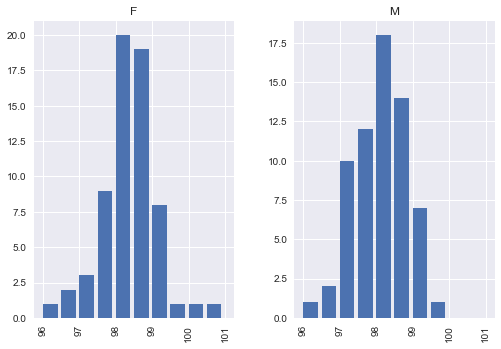

In [23]:
# Show histograms for males and females separately
df['temperature'].hist(by=df['gender'], width=0.4, range=[96, 101])
None

## Conclusion

The normal body temperature has been generally accepted as 98.6$^{\circ}$F for a long time, but the dataset here shows that the mean body temperature from a sample of 130 subjects is about 98.2$^{\circ}$F. Using the sample to test whether the true body temperature is 98.6$^{\circ}$F or not, we obtain a t-statistic of -5.455 with a p-value less than 0.001, rendering evidence to reject the widely accepted view. Moreover, the 99% confidence interval of the mean temperature ranges from 98.08 to 98.42 and is still strictly below the claim of 98.6. 

The mean temperatures for men and women are 98.1 and 98.4, which are both within the 99% confidence interval. A natural question is to ask if the difference between gender is statistically significant. A two-sample t test yields a t-statistic of -2.285 with a p-value of 0.024, providing no strong evidence for or against the claim of no difference. However, women having higher core temperatures on average might help explain why women often feel colder than men. Since women are used to high body temperatures, cold air will feel even colder to the body. But more research is needed to answer the question on the gender difference in body temperatures and explain why.